<a href="https://colab.research.google.com/github/asheta66/CNN-WorkOut/blob/main/simplelinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Simple Linear Regression
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import pandas as pd
#con = pd.read_csv('Data/ConcreteStrength.csv')
#con

# Importing the datasets
import sklearn.datasets
diabetes = sklearn.datasets.load_diabetes()
X, y = diabetes['data'], diabetes['target']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 0)

In [4]:
print(diabetes.keys())
print(diabetes.DESCR)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - 

In [5]:
# Import pandas
import pandas as pd
# Read the DataFrame, first using the feature data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# Add a target column, and fill it with the target data
df['target'] = diabetes.target
# Show the first five rows

df.info()
df.head(-20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
417,-0.052738,-0.044642,0.071397,-0.074528,-0.015328,-0.001314,0.004460,-0.021412,-0.046879,0.003064,55.0
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021394,0.007207,84.0
419,-0.020045,-0.044642,-0.054707,-0.053871,-0.066239,-0.057367,0.011824,-0.039493,-0.074089,-0.005220,42.0
420,0.023546,-0.044642,-0.036385,0.000068,0.001183,0.034698,-0.043401,0.034309,-0.033249,0.061054,146.0


In [6]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set result ￼
y_pred_train = regressor.predict(X_train)
y_pred_test  = regressor.predict(X_test)

# Showing the model parameters which include the interecpt (a0) and the rest of model paremeters
regressor.score(X_train, y_train)
print('Showing the developed LR model parameters')
print('a0=', format(regressor.intercept_,".5f"));
formatted_array = ["%i: %s" % (index+1, val) for index, val in  enumerate(regressor.coef_)]
print(formatted_array)

Showing the developed LR model parameters
a0= 153.06798
['1: -43.26774487031572', '2: -208.67053950987793', '3: 593.397972132367', '4: 302.898149030857', '5: -560.2768982392026', '6: 261.4765710643338', '7: -8.833439522914233', '8: 135.93715156222171', '9: 703.2265842727315', '10: 28.348443542650045']


In [7]:
# Calculating Performance Criteria
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

mse1 = mean_squared_error(y_train, y_pred_train)
mse2 = mean_squared_error(y_test, y_pred_test)

mae1 = mean_absolute_error(y_train, y_pred_train)
mae2 = mean_absolute_error(y_test, y_pred_test)

vs1 = explained_variance_score(y_train, y_pred_train)
vs2 = explained_variance_score(y_test, y_pred_test)


print('mean_squared_error_train (MSE):', format(mse1,".5f"), '    ', 'mean_squared_error_test (MSE):', format(mse2,".5f"),)
print('mean_absolute_error_train (MAE):', format(mae1,".5f"), '    ', 'mean_absolute_error_test (MAE):', format(mae2,".5f"),)
print('Variance_score_train (VarScore):', format(vs1,".5f"), '    ', 'Variance_score_test (VarScore):', format(vs2,".5f"),)


mean_squared_error_train (MSE): 2780.06232      mean_squared_error_test (MSE): 3180.19884
mean_absolute_error_train (MAE): 42.85436      mean_absolute_error_test (MAE): 45.12099
Variance_score_train (VarScore): 0.55544      Variance_score_test (VarScore): 0.36219


In [8]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler

mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['lines.dashed_pattern'] = [6, 6]
mpl.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
mpl.rcParams['lines.dotted_pattern'] = [1, 3]
mpl.rcParams['lines.scale_dashes'] = False

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.numpoints'] = 2
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['legend.framealpha'] = None
mpl.rcParams['legend.scatterpoints'] = 3
mpl.rcParams['legend.edgecolor'] = 'inherit'

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.numpoints'] = 2
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['legend.framealpha'] = None
mpl.rcParams['legend.scatterpoints'] = 3
mpl.rcParams['legend.edgecolor'] = 'inherit'


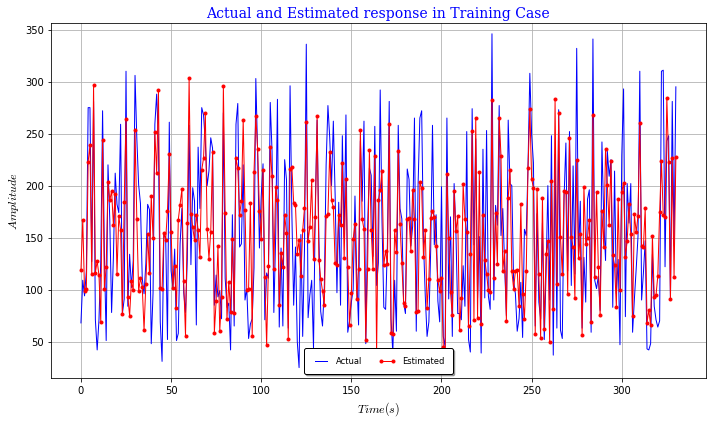

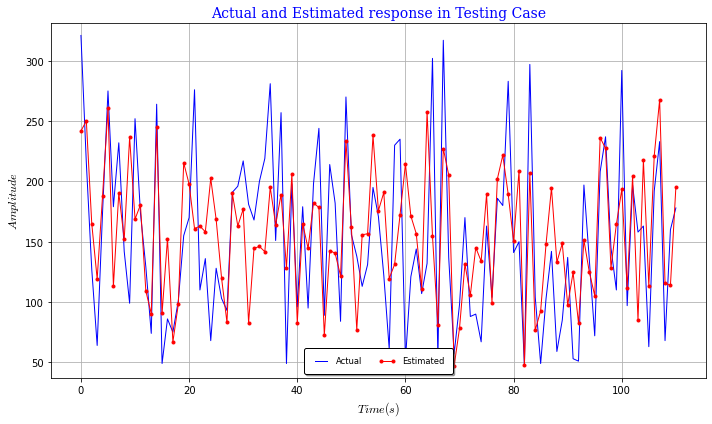

In [9]:
# Drawing the actual and estimated responses

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(y_train, '-b', label='Actual')
plt.plot(y_pred_train, '.-r', label='Estimated')
plt.xlabel(r'$ Time (s)$', fontsize=12)
plt.ylabel(r'$ Amplitude$', fontsize=12)
plt.title(r'Actual and Estimated response in Training Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+10)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='lower center', ncol=2)
plt.grid(True)
plt.show()

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(y_test, '-b', label='Actual')
plt.plot(y_pred_test, '.-r', label='Estimated')
plt.xlabel(r'$ Time (s)$', fontsize=12)
plt.ylabel(r'$ Amplitude$', fontsize=12)
plt.title(r'Actual and Estimated response in Testing Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+10)
plt.grid(True)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='lower center', ncol=2)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\Actual_Estimated.png')
plt.show()

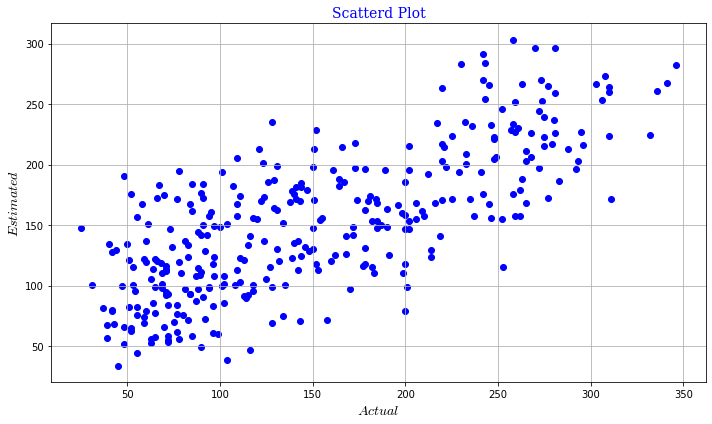

In [10]:
# drawing Scatterplots
fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.scatter(y_train, y_pred_train)
plt.xlabel(r'$ Actual $', fontname= 'serif',fontsize=14, color='k')
plt.ylabel(r'$ Estimated $', fontname= 'serif',fontsize=14, color='k')
plt.title(r'Scatterd Plot', fontname= 'serif',fontsize=14, color='b')
plt.grid(True)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\scatter.png')
plt.show()
